# Tropics map showing sub-regions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker

import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


In [2]:
save_dir = "/home/b/b380887/cold-point-overshoot/plots/d2_paper_poster/"


In [10]:
def plot_base_map(tsize=40, numsize=20, lw=8, msize=12, markcolor="firebrick",
                 show_soundings=True, show_labels=True, save=False, defense=False):
    """ Plot the tropics map with boxes. Harcoded coords.
    """
    stamen_terrain = cimgt.Stamen('terrain-background')
    
    # region box coordinates
    sca_coords = [20, 30, -17, -7]
    tim_coords = [120, 130, -12, -2]
    spc_coords = [170, 180, -15, -5]
    amz_coords = [-65, -55, -30, -20]
    amz_big_coords = [-72, -47, -30, 0]
    spc_big_coords = [165, -145, -20, -5]
    
    # sounding coordinates
    tim_stns = [
        [123.66, -10.16],
        [128.08, -3.7],
        [130.89, -12.42],
        [131.3, -7.98],
        [119.55, -5.06]
    ]
    sca_stns = [
        [31.01, -17.83]
    ]
    spc_stns = [
        [179.21, -8.51]
    ]
    amz_stns = [
        [-59.05, -27.45]
    ]
    stn_list = [*tim_stns, *sca_stns, *amz_stns, *spc_stns]

    
    # where to put the labels
    # 6 degrees above/below
    xy_dict = {
        "AMZ": (-60, -15),
        "SPC": (175, 0),
        "SCA": (25, -2),
        "TIM": (125, 3)
    }

    fig = plt.figure(figsize=(40, 8))

    projection = ccrs.PlateCarree(central_longitude=80)
    ax = plt.axes(projection=projection)
    ax.add_image(stamen_terrain, 4)
    ax.set_extent([-179.99, 180, -30.1, 10.1], crs=projection)


    # gridlines and axis labels
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=2, color='k', alpha=0.25, linestyle='--',
                      xlocs=np.arange(-180, 181, step=20), ylocs=np.arange(-30, 31, step=10))
    gl.xlabel_style = {'size': numsize}
    gl.ylabel_style = {'size': numsize}
    gl.top_labels = False
    gl.right_labels = False

    # add analysis regions
    for i, coords in enumerate([spc_coords, amz_coords, sca_coords, tim_coords]):
        if defense:
            if i > 1:
                color = "gray"
            else:
                color = "blue"
        else:
            color = "k"
        ax.add_patch(mpatches.Rectangle(xy=[coords[0], coords[2]], width=10, height=10,
                                        fill=False, color=color, linewidth=lw,
                                        transform=ccrs.PlateCarree()))

    # big SPC
    ax.add_patch(mpatches.Rectangle(xy=[spc_big_coords[0], spc_big_coords[2]], width=50, height=15,
                                    fill=False, color='k', linewidth=lw-2, linestyle="--",
                                    transform=ccrs.PlateCarree()))

    # big AMZ
    ax.add_patch(mpatches.Rectangle(xy=[amz_big_coords[0], amz_big_coords[2]], width=25, height=30,
                                    fill=False, color='k', linewidth=lw-2, linestyle="--",
                                    transform=ccrs.PlateCarree()))
    
    
    # dots for sounding locations
    if show_soundings:
        sound = "_with_soundings"
        for i, coord in enumerate(stn_list):
            ax.plot(coord[0], coord[1], marker='o', markersize=msize, markeredgewidth=2,
                 markerfacecolor=markcolor, markeredgecolor=markcolor,
                 transform=ccrs.PlateCarree())
    else:
        sound = ""
        
    
    # text labels for region names
    if show_labels:  
        labs = "_with_labels"
        transform = ccrs.PlateCarree()._as_mpl_transform(ax)
        for region in xy_dict.keys():
            if defense:
                if region == "SCA" or region == "TIM":
                    color = "gray"
                else:
                    color = "blue"
            else:
                color = "k"
            ax.annotate(region, xy_dict[region], xycoords=transform, color=color,
                          ha="center", va="center", fontsize=tsize, weight="bold")
    else:
        labs = ""
        
    if defense:
        deff = "defense_"
    else:
        deff = ""

    # save
    if save:
        plt.savefig(save_dir + "{d}tropics_map{s}{l}.png".format(d=deff, s=sound, l=labs),
                    dpi=300, bbox_inches="tight")
        
    plt.show()


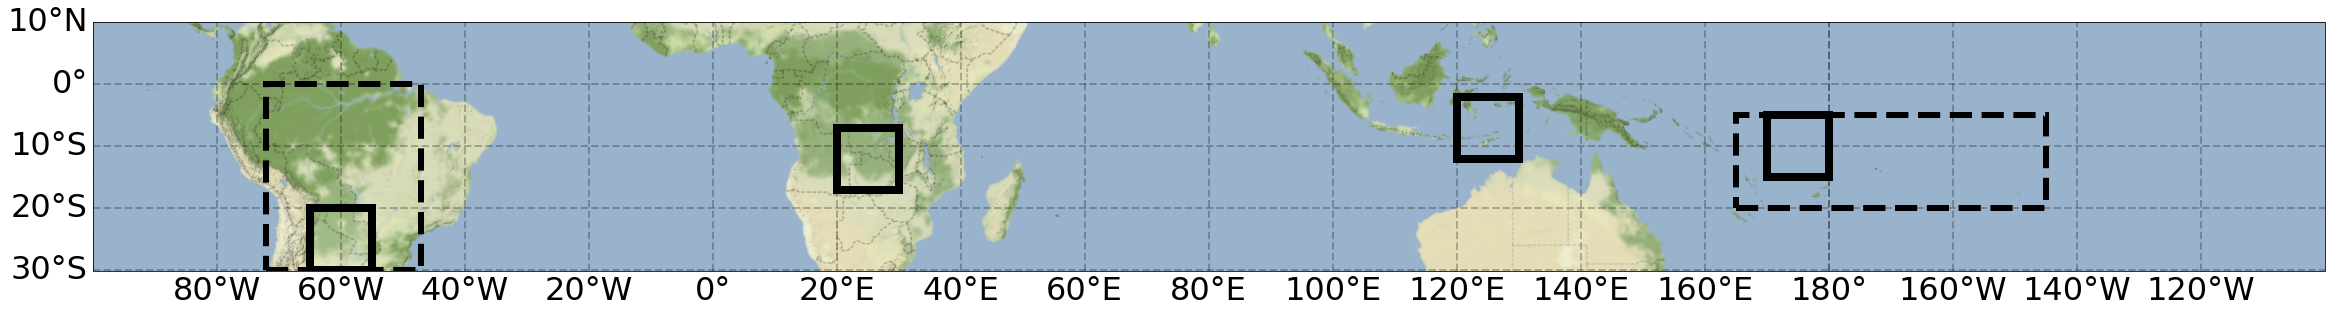

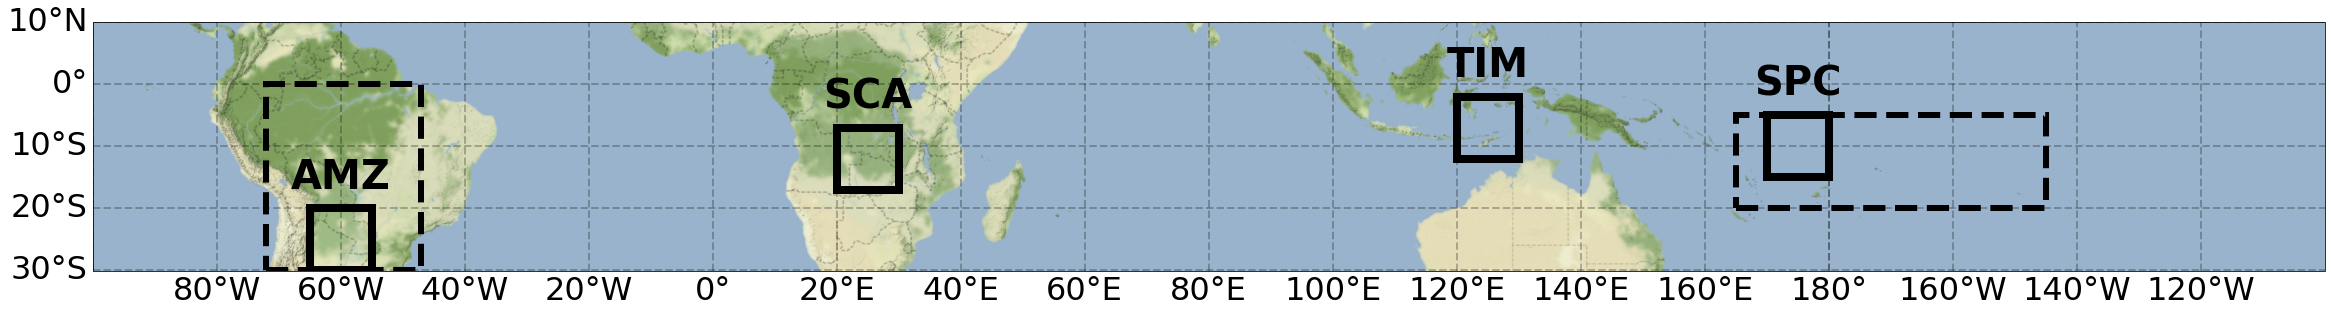

In [12]:
numsize = 32
tsize = 40

plot_base_map(tsize=tsize, numsize=numsize, 
              show_soundings=False, show_labels=False, save=True)

plot_base_map(tsize=tsize, numsize=numsize, 
              show_soundings=False, show_labels=True, save=True)


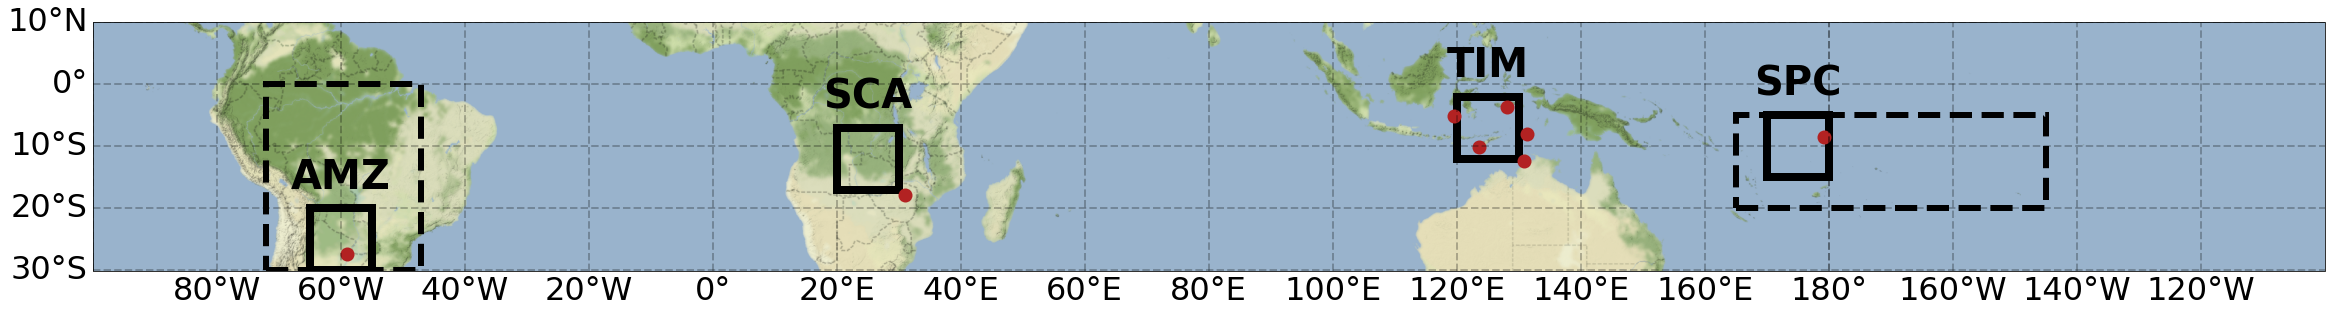

In [20]:
plot_base_map(tsize=tsize, numsize=numsize, markcolor="firebrick",
              show_soundings=True, show_labels=True, save=True)


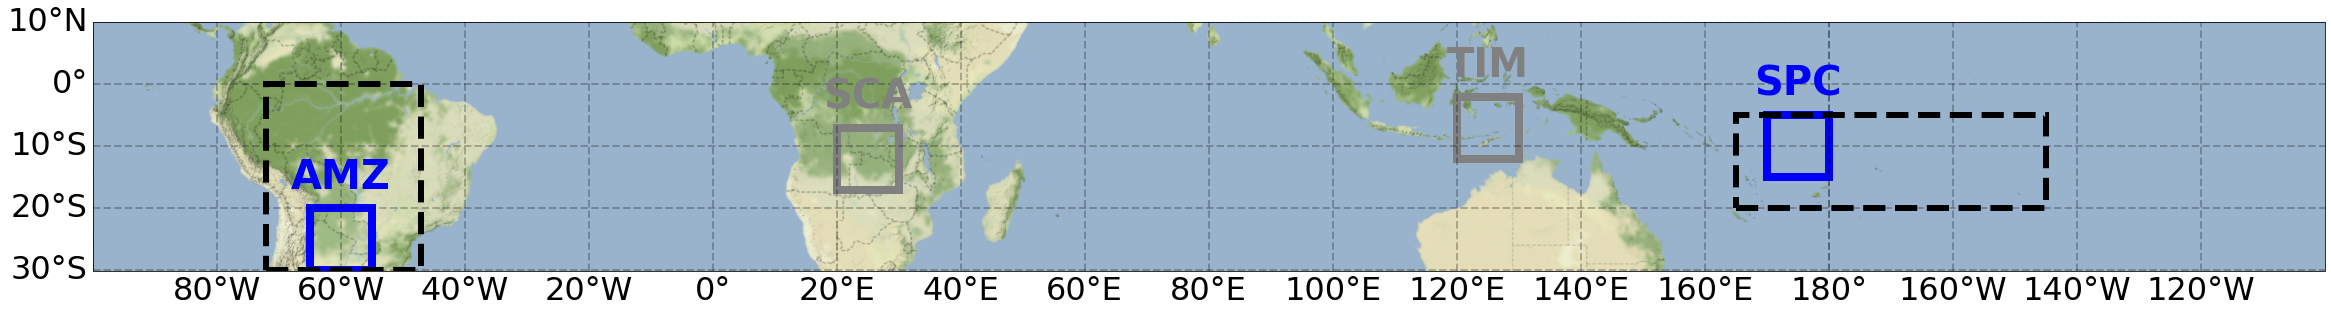

In [11]:
numsize = 32
tsize = 40

plot_base_map(tsize=tsize, numsize=numsize, defense=True,
              show_soundings=False, show_labels=True, save=True)
